In [1]:
import nd2
import numpy as np
from tqdm.notebook import trange

from scipy.signal import correlate2d

import matplotlib.pyplot as plt

In [30]:
red_file = "../data/raw/mScarlet/TMP-FAST_80_2_mScarlet.nd2"
green_file = "../data/raw/0TMP-FAST_80um_2.nd2"

red_file = "../data/raw/mScarlet/TMP-FAST_200_3_mScarlet.nd2"
green_file = "../data/raw/0TMP-FAST_200um_3.nd2"

red_file = "../data/raw/mScarlet/TMP-FAST_400_3_mScarlet.nd2"
green_file = "../data/raw/0TMP-FAST_400um_3.nd2"

In [31]:
red_nd2 = nd2.ND2File(red_file)
green_nd2 = nd2.ND2File(green_file)

/tmp/ipykernel_20287/168196950.py:1: UserWarning: ND2File file not closed before garbage collection. Please use `with ND2File(...):` context or call `.close()`.
  red_nd2 = nd2.ND2File(red_file)


In [32]:
green_dask = green_nd2.to_dask()
green_img = green_dask[0, 0, ...].compute()

In [33]:
red_img = red_nd2.asarray()[0]

In [34]:
mses = np.empty(
    np.array(red_img.shape) - np.array(green_img.shape)+1
)
mses.shape

for i in trange(mses.shape[0]):
    for j in range(mses.shape[1]):
        sly = slice(i, i + green_img.shape[0])
        slx = slice(j, j + green_img.shape[1])
        mses[i, j] = np.mean((red_img[sly, slx]-green_img)**2)

  0%|          | 0/1 [00:00<?, ?it/s]

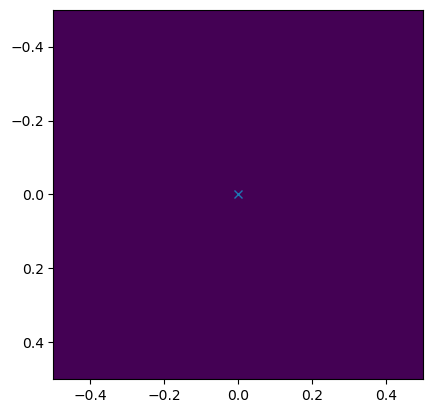

In [35]:
plt.imshow(mses)
y, x = np.unravel_index(np.argmin(mses), mses.shape)
plt.plot(x, y, marker="x")

In [36]:
def rgb(x):
    return (x - x.min()) / (x.max() - x.min())

new_img = np.zeros(red_img.shape+(3,))
print(new_img.shape)
new_img[..., 0] = rgb(red_img)
sly = slice(y, y+green_img.shape[0])
slx = slice(x, x+green_img.shape[1])
new_img[sly, slx, 1] = rgb(green_img)

(1024, 1024, 3)


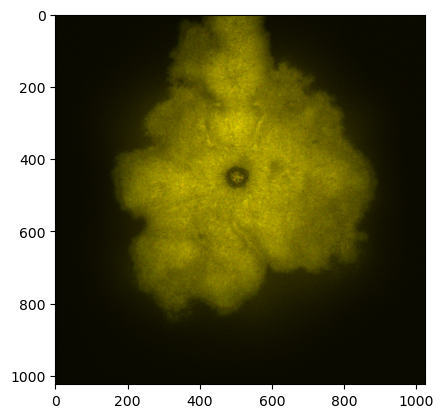

In [37]:
plt.imshow(new_img)

In [38]:
y, x

(0, 0)